**THIS CHAPTER IS UNDER CONSTRUCTION!!!**

(stat-infer)=
# Statistical inference

## Statistics, estimators, and their distributions

Our story of statistical inference begins by defining exactly what we mean by a _statistic_. The definition we give is very abstract in order to cover all the different cases in which statistics appear. However, as we go through the rest of the chapter, the statistics that we consider will mostly be familiar ones like means, variances, and standard deviations, as well as parameter estimators.

```{prf:definition}
:label: statistic-def

Let $\bX$ be a $m$-dimensional random vector. A _statistic_ is a random variable of the form

$$
T = r(\bX),
$$

where $r:\bbr^m \to \bbr$ is a real-valued function. An observed value $t$ of $T$ is called an _observed statistic_ or _empirical statistic_.
```

If we conceptualize the components of a random vector $\bX$ as a random sample $X_1,X_2,\ldots,X_m$, then a statistic

$$
T = r(X_1,X_2,\ldots,X_m)
$$

is simply a function of the sample. Crucially important examples of statistics (and empirical statistics) include those defined as follows:

```{prf:definition}
:label: sample-mean-var-def

Let $\bX = (X_1,\ldots,X_m)$ be an $m$-dimensional random vector. The _sample mean_ is defined to be the statistic

$$
\overline{X} \def \frac{1}{m}(X_1+\cdots+X_m),
$$

while the _sample variance_ is defined to be the statistic

$$
S^2 \def \frac{1}{m-1} \sum_{i=1}^m(X_i - \overline{X})^2.
$$

The corresponding empirical statistics are the _empirical mean_ and _empirical variance_ defined as

$$
\overline{x} \def \frac{1}{m}(x_1+\cdots+x_m) \quad \text{and} \quad s^2 \def \frac{1}{m-1} \sum_{i=1}^m(x_i - \overline{x})^2.
$$
```

As we mentioned above, very often the component random variables $X_1,X_2,\ldots,X_m$ of the random vector $\bX$ in the definition are assumed to form a random sample, i.e., an IID sequence of random variables. The dimension $m$ is then referred to as the _sample size_. In principle, then, the sample size $m$ can be _any_ positive integer, and so it is often convenient to write $\overline{X}_m$ for the sample mean, explicitly displaying the sample size. This gives us an entire _infinite sequence_ of sample means, one for each sample size $m$.

Since statistics are random vectors, they have their own probability distributions. These are given special names:

```{prf:definition}
:label: samp-dist-def

The probability distribution of a statistic $T$ is called the _sampling distribution_ of $T$.
```

In general, computing the sampling distributions of statistics is difficult. But if we actually have _observed_ data $x_1,x_2,\ldots,x_m$, then (as you will explore in the programming assignment) there is a resampling method known as _bootstrapping_ that yields approximations to sampling distributions. An example is given by the histogram (with KDE) on the right-hand side of the following figure, where a histogram (with KDE) of the empirical distribution of an observed dataset is given on the left-hand side:

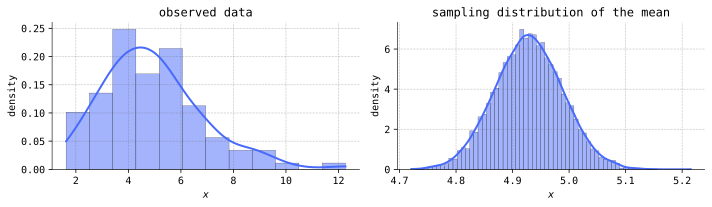

In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import matplotlib_inline.backend_inline
import matplotlib.colors as clr
import warnings
plt.style.use('../aux-files/custom_style_light.mplstyle')
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
warnings.filterwarnings("ignore")
blue = '#486AFB'
magenta = '#FD46FC'

np.random.seed(42)
X = ss.gamma(a=5)

sample_size = 100
resample_size = 1000
random_sample = X.rvs(size=sample_size)
replicate_means = []
num_resamples = 10000

for _ in range(num_resamples):
    sample = np.random.choice(a=random_sample, size=resample_size, replace=True)
    replicate_means.append(sample.mean())

_, axes = plt.subplots(ncols=2, figsize=(10, 3))

sns.histplot(x=random_sample, ec='black', stat='density', kde=True, ax=axes[0])
sns.histplot(x=replicate_means, ec='black', stat='density', kde=True, ax=axes[1])
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('density')
axes[0].set_title('observed data')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('density')
axes[1].set_title('sampling distribution of the mean')
plt.tight_layout()

Observe that the sampling distribution on the right-hand side appears to be well approximated by a normal distribution. This is actually a manifestation of the Central Limit Theorem (see {prf:ref}`clt-thm`), which says that the sample means $\overline{X}_m$ converge (in distribution) to a normal distribution as $m\to \infty$, provided that the random variables are IID. This is true even when the observed data are not normally distributed.

Though our definition of a statistic (in {prf:ref}`statistic-def`) is a _completely arbitrary function_ of the data, very often statistics are constructed with a particular "target" in mind. For example, if we suppose that we have an IID random sample

$$
X_1,X_2,\ldots,X_m
$$

drawn from a distribution with mean $\mu$ and variance $\sigma^2$, then the sample mean $\overline{X}$ and variance $S^2$ are cooked up as sample-based proxies for $\mu$ and $\sigma^2$. The sample mean and variance are not haphazardly constructed statistics with no clear purpose---rather, they are "aimed" at $\mu$ and $\sigma^2$. When statistics are constructed to serve as estimators for preexisting quantities of interest, they are (naturally) called _estimators_:

```{prf:definition}
:label: exp-var-estimators-def

Let $X_1,X_2,\ldots,X_m\sim P$ be an IID random sample drawn from some probability distribution $P$, and let $\theta$ be a quantity of interest, possibly (and very often) a parameter of the distribution $P$. A statistic $T = r(X_1,X_2,\ldots,X_m)$ that is intended to serve as an estimator of $\theta$ is called an _estimator_ and is often denoted by $\hat{\theta}$ instead of $T$.

1. The _expected value_ of the estimator is the quantity

    $$
    \mu_{\hat{\theta}} \def E(\hat{\theta}).
    $$

    The _bias_ of the estimator is the difference $E(\hat{\theta}) - \theta$. The estimator is said to be _unbiased_ if its bias is $0$.

3. The _variance_ of the estimator is the quantity

    $$
    \sigma^2_{\hat{\theta}} \def V(\hat{\theta}).
    $$ 

2. The _standard error_ of the estimator is the quantity

    $$
    \sigma_{\hat{\theta}} \def \sqrt{\sigma^2_{\hat{\theta}}}.
    $$
```

Observed values of estimators are called _estimates_ and, confusingly, they are also often denoted $\hat{\theta}$. So, the single notation $\hat{\theta}$ very often stands for two things, the estimator itself, and its observed values.

As our first example, let's compute the bias and standard error of the sample mean. Note that the sample mean may also be written as $\hat{\mu}$, since it is intended as an estimator of $\mu$.

```{prf:theorem} Properties of the sample mean
:label: prop-sample-mean-thm

Let $X_1,X_2,\ldots,X_m$ be an IID random sample from a distribution with mean $\mu$ and standard deviation $\sigma$.

1. The expectation of the sample mean $\overline{X}$ is $\mu$, and thus the sample mean is an unbiased estimator of $\mu$.
2. The variance of the sample mean $\overline{X}$ is $\sigma^2/m$, and hence its standard error is $\sigma_{\overline{X}} = \sigma/\sqrt{m}$.
3. If the $X_i$'s are normally distributed, then so too is the sample mean $\overline{X}$.
```


```{prf:proof}

Each random variable $X_i$ has mean $\mu$. By linearity of expectation, we have

$$
E(\overline{X}) = \frac{1}{m}E(X_1 + \cdots + X_m) = \frac{1}{m}\left[ E(X_1) + \cdots + E(X_m) \right] = \frac{1}{m} \cdot m \mu = \mu.
$$

This proves statement (1). For (2), we note that each $X_i$ has variance $\sigma^2$ and that they are independent. But independent random variables are uncorrelated, and so by {prf:ref}`variance-lin-combo-thm` we get

$$
V(\overline{X}) = \frac{1}{m^2} \sum_{i=1}^m V(X_i) = \frac{1}{m^2} \cdot m \sigma^2 = \frac{\sigma^2}{m}.
$$

Thus, the standard error is $\sqrt{\sigma^2/m} = \sigma / \sqrt{m}$. This proves statement (2). Statement (3) follows from {prf:ref}`char-normal-thm`. Q.E.D.
```


























(CIs)=
## Confidence intervals

Suppose we have constructed an estimator

$$
\hat{\theta} = r(X_1,X_2,\ldots,X_m)
$$

for some quantity of interest $\theta$, as a function of an IID random sample $X_1,X_2,\ldots,X_m \sim P$. If we feed in an observed dataset $x_1,x_2,\ldots,x_m$ to the estimator, then we produce a single-number estimate, or _point estimate_, for theta:

```{image} ../img/point-est.svg
:width: 65%
:align: center
```
&nbsp;

On the number line, we have marked a point estimate, as well as the "true" value of the quantity $\theta$ to be estimated. Now, the point estimate may prove to be sufficient for our needs, but sometimes we would like an entire _interval estimate_ for $\theta$. Or, said differently, we would like an interval that yields estimates for $\theta$ while also giving some sense of the variability in the estimate. These intervals are called _confidence intervals_:

```{image} ../img/ci.svg
:width: 65%
:align: center
```
&nbsp;

The end points of the interval will depend on three things:

1. A predetermined _confidence level_ that, in some sense, tells us how likely it is that the interval contains the "true" value $\theta$. As your intuition would suggest, higher confidence levels generally go with wider confidence intervals.
2. The distribution $P$ from which the random sample $X_1,X_2,\ldots,X_m$ is drawn.
3. The variability in the estimator $\hat{\theta}$ itself, as measured by its standard error $\sigma_{\hat{\theta}}$.

So, a confidence interval (centered at the point estimate $\hat{\theta}$) often looks like

$$
\left( \hat{\theta} - l \cdot \sigma_{\hat{\theta}} , \hat{\theta} + u \cdot \sigma_{\hat{\theta}}  \right),
$$

where the (positive) numbers $l$ and $u$ depend on both the confidence level of the interval and the underlying data distribution. (In this form, notice that a smaller standard error yields a narrower interval.) The goal of this section is to describe several types of confidence intervals for different types of estimators and underlying distributions $P$.

We begin in the simple case of a normally distributed random sample

$$
X_1,X_2,\ldots,X_m \sim \mathcal{N}(\mu,\sigma^2)
$$

with unknown mean $\mu$ and known variance $\sigma^2$. A natural estimator for $\mu$ is the sample mean $\overline{X}$ studied in the previous section. Thus, we aim to construct a confidence interval of the form

$$
\left( \overline{X} - l \cdot \sigma_{\overline{X}}, \overline{X} + u \cdot \sigma_{\overline{X}} \right) = \left( \overline{X} - l \cdot \frac{\sigma}{\sqrt{m}}, \overline{X} + u \cdot \frac{\sigma}{\sqrt{m}} \right).
$$


Of course, the empirical mean $\bar{x}$ serves as an estimate for $\mu$. But $\bar{x}$ depends on the dataset, and thus $\bar{x}$ carries variability---a different dataset would yield a different empirical mean $\bar{x}$, and thus a different estimate for $\mu$. To account for this variability, we may want to produce not only a single _point estimate_ for $\mu$, but rather an entire _interval estimate_, i.e., an interval of values that captures the "true" value of $\mu$ with a certain level of confidence. To produce such an interval estimate, we consider the following statistic:

```{prf:theorem}
:label: standardized-mean-thm

Let $X_1,X_2,\ldots,X_m$ be an IID random sample from a normal distribution with mean $\mu$ and standard deviation $\sigma$. Then the statistic

$$
Z = \frac{\overline{X} - \mu}{\sigma/\sqrt{m}}
$$

has a standard normal distribution. This statistic is called the _standardized mean_.
```

The standardized mean is obtained by first subtracting the expected value $\mu = E(\overline{X})$ of the sample mean $\overline{X}$ from itself, and then dividing by the standard error $\sigma_{\overline{X}} = \sigma/\sqrt{m}$. The crucial property of the standardized mean is that its distribution does _not_ depend on the unknown "true" value of $\mu$. Such a statistic is sometimes called a _pivotal quantity_. 

Now, suppose that we choose a number $\alpha \in [0,1]$. Since $Z$ is a standard normal variable, we have

$$
P(-z_{\alpha/2} < Z < z_{\alpha/2}) = 1 - \alpha,
$$

where $z_{\alpha/2}$ is the critical value defined so that

$$
\Phi(z_{\alpha/2}) = 1 - \alpha/2,
$$

where $\Phi$ is the cumulative distribution function of $Z$. But the inequality

$$
-z_{\alpha/2} < Z < z_{\alpha/2}
$$

is easily seen to be equivalent to the inequality

$$
\overline{X} -z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{m}} < \mu < \overline{X} + z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{m}},
$$ (ci-first-eq)

and so we have

$$
P\left( \overline{X} -z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{m}} < \mu < \overline{X} + z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{m}} \right) = 1 - \alpha.
$$ (prob-ci-eq)

Interpreting this equality requires some care. First, we must understand that the mean $\mu$, although it is unknown to us, is assumed _fixed_ and does not vary. The variable quantity in the inequality {eq}`ci-first-eq` is the sample mean $\overline{X}$, _not_ the mean $\mu$. So, when we interpret {eq}`prob-ci-eq` as saying that the probability that $\mu$ lies in the interval

$$
\left( \overline{X} -z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{m}}, \overline{X} + z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{m}}\right)
$$ (ci-second-eq)

is $1-\alpha$, we must always remember that it is the interval that is random, not $\mu$!

Substitution of an observation of the sample mean $\overline{X}$ into the interval {eq}`ci-second-eq` produces our first example of a _confidence interval_. Such an observation is nothing but an empirical mean $\bar{x}$ obtained from a dataset.

```{prf:definition}
:label: CI-norm-defn

Let $X_1,X_2,\ldots,X_m$ be an IID random sample from a normal distribution with **unknown** mean $\mu$ and **known** standard deviation $\sigma$, and let $\bar{x}$ be the empirical mean computed from an observed dataset. For $\alpha\in [0,1]$, the interval

$$
\left(\bar{x} - z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{m}}, \bar{x} + z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{m}} \right)
$$ (ci-third-eq)

is called a _$100(1-\alpha)\%$ confidence interval_ for the mean $\mu$.
```

Again, we must remember that the interval {eq}`ci-third-eq` is but _one_ realization of the random interval {eq}`ci-second-eq`. It is therefore _not_ correct to say that the true value $\mu$ lies in the interval {eq}`ci-third-eq` with probability $1-\alpha$. Rather, a frequentist interpretation of probability would tell us that if we repeatedly sampled the true distribution $\mathcal{N}(\mu,\sigma^2)$ over and over again many times, producing a large number of empirical means $\bar{x}$ and therefore also a large number of confidence intervals {eq}`ci-third-eq`, then approximately $100(1-\alpha)\%$ of the confidence intervals would contain the true value $\mu$.

In the rest of this section, we shall be interested in generalizing our initial construction of a confidence interval in two ways. First: We would like to have confidence intervals in the (more realistic) scenario when _both_ the mean $\mu$ and variance $\sigma^2$ of the underlying normal distribution are unknown. This will lead us to confidence intervals involving critical values $z_{\alpha/2}$ not drawn from a standard normal distribution, but rather from a new type of distribution called a _$t$-distribution_. Second: We would like to have confidence intervals for data drawn from _any_ distribution, not only normal distributions. But in order to obtain these confidence intervals, we must assume that our observed datasets are large, enabling us to invoke the Central Limit Theorem. And, besides only working for "large" samples, in this case we must also settle for _approximate_ confidence intervals.


We begin by considering the first generalization, when we have data drawn from a normal distribution $\mathcal{N}(\mu,\sigma^2)$ with unknown mean and variance.

```{prf:definition}
:label: t-dist-defn

Let $\nu\geq 1$ be an integer. A continuous random variable $X$ is said to have a *$t$-distribution with $\nu$ degrees of freedom*, denoted

$$
X \sim t_{\nu},
$$

if its probability density function is given by

$$
f(x;\nu) = \frac{\Gamma\left(\frac{\nu+1}{2} \right)}{\Gamma\left( \frac{\nu}{2} \right) \sqrt{\nu\pi}}\left(1 + \frac{x^2}{\nu} \right)^{- \frac{\nu+1}{2}}
$$

with support $\bbr$.
```

```{prf:theorem}
:label: student-mean-thm

Let $X_1,X_2,\ldots,X_m$ be an IID random sample from a normal distribution with mean $\mu$ and standard deviation $\sigma$, and let $\bar{x}$ and $s$ be the empirical mean and standard deviation computed from an observed random sample. Then the statistic

$$
T = \frac{\overline{X} - \mu}{s/\sqrt{m}}
$$

has a $t_{m-1}$ distribution. This statistic is called the _studentized mean_.
```

```{prf:theorem}
:label: t-CI-thm

Let $X_1,X_2,\ldots,X_m$ be an IID random sample from a normal distribution with **unknown** mean $\mu$ and **unknown** standard deviation $\sigma$, and let $\bar{x}$ and $s$ be the empirical mean and standard deviation computed from an observed random sample. For $\alpha \in [0,1]$, the interval

$$
\left( \overline{x} - t_{\alpha/2, m-1} \cdot \frac{s}{\sqrt{m}}, \overline{x} + t_{\alpha/2, m-1} \cdot \frac{s}{\sqrt{m}} \right)
$$

is a $100(1-\alpha)\%$ confidence interval for the mean $\mu$.
```

```{prf:theorem} Central Limit Theorem
:label: clt-thm

Let $X_1,X_2,\ldots,X_m$ be an IID random sample from a distribution with mean $\mu$ and standard deviation $\sigma$. Then, in the limit as $m\to \infty$, we have

$$
\lim_{m\to \infty} P \left( \frac{\overline{X} - \mu}{\sigma/\sqrt{m}} \leq z \right) = P(Z \leq z) = \Phi(z),
$$

where $Z \sim \mathcal{N}(0,1)$.
```



```{prf:theorem}
:label: CI-large-sample-thm

Let $X_1,X_2,\ldots,X_m$ be an IID random sample from a distribution with **unknown** mean $\mu$ and **known** standard deviation $\sigma$, and let $\bar{x}$ be the empirical mean computed from an observed random sample. For $\alpha\in [0,1]$ and $m$ sufficiently large, the random interval

$$
\left(\bar{x} - z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{m}}, \bar{x} + z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{m}} \right)
$$

is approximately a $100(1-\alpha)\%$ confidence interval for the mean $\mu$.
```



## Hypothesis tests









## Statistical inference in linear regression

We begin our discussion in this section by considering an observed dataset

$$
y_1,y_2,\ldots,y_m \in \bbr.
$$

As always, the $y$'s are conceptualized as observed values of a random variable $Y$. The goal of a linear regression model is to "explain" the variability of the $y$'s through a linear relationship to (the observed values of) another random variable $X$, the _explanatory variable_ or the _predictor variable_. In this case, $Y$ is called the _response variable_.

So, we suppose that our $y$'s form part of an observed bivariate dataset

$$
(x_1,y_1),(x_2,y_2),\ldots,(x_m,y_m) \in \bbr^2.
$$

A measure of variability of the $y$'s is the empirical variance

$$
s^2 = \frac{1}{m-1} \sum_{i=1}^m (y_i - \bar{y})^2.
$$

In our analysis, however, it is convenient to measure the variability via the quantity

$$
SST \def \sum_{i=1}^m (y_i - \bar{y})^2,
$$

called the _total sum of squares_. The fundamental insight in this section is that the total sum of squares may be decomposed as a sum of two _other_ sums of squares, one which accounts for the variance "explained" via a linear regression model, and the other that accounts for the residual or "unexplained" variance.

To obtain these other sums of squares, we suppose that our (simple) linear regression model has parameters $\beta_0$, $\beta_1$, and $\sigma^2$. We saw in {prf:ref}`mle-simple-lin-reg-cor` that the maximum likelihood estimates

$$
\hat{\beta}_0 \def (\beta_0)_\text{MLE}^\star \quad \text{and} \quad \hat{\beta}_1 \def (\beta_1)_\text{MLE}^\star
$$

for the "true" bias and slope terms $\beta_0$ and $\beta_1$ are

$$
\hat{\beta}_1 = \frac{\sum_{i=1}^m \left(x_i - \bar{x} \right)\left( y_i - \bar{y} \right)}{\sum_{i=1}^m \left(x_i - \bar{x} \right)^2} \quad \text{and} \quad \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}.
$$

We also defined the _predicted values_ and _residuals_ by the equations

$$
\hat{y}_i = \beta_0 + \beta_1 x_i \quad \text{and} \quad r_i = y_i - \hat{y}_i.
$$

These definitions of $\hat{y}_i$ and $r_i$ suited our brief analysis in {numref}`Chapter %s <prob-models>`. However, in order to obtain their values, we would need to know the "true" values of $\beta_0$ and $\beta_1$, which we presumably don't know! So, our discussion in this section begins with alternate definitions of these quantities based on the MLEs for the bias and slope terms:

```{prf:definition}
:label: predict-resid-defn

We define the *$i$-th predicted value* and *$i$-th residual* to be

$$
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i \quad \text{and} \quad r_i = y_i - \hat{y}_i,
$$

for each $i=1,2,\ldots,m$.
```

With these new definitions of predicted and residual values in hand, we now define the two other sums of squares mentioned above:

```{prf:definition}
:label: ss-defn

We define

$$
SSE = \sum_{i=1}^m (y_i - \hat{y}_i)^2 \quad \text{and} \quad SSR = \sum_{i=1}^m (\hat{y}_i - \bar{y})^2,
$$

called the _error sum of squares_ and _regression sum of squares_.
```

Using these new sums of squares, we state and prove that the total sum of squares may be decomposed as the error and regression sums of squares. This is called the "ANOVA" identity, which is short for _analysis of variance_.

```{prf:theorem} ANOVA identity for linear regression
:label: anova-lr-thm

There is an equality $SST = SSE + SSR$.
```

```{prf:proof}

We begin by noting that

\begin{align*}
SST &= \sum_{i=1}^m ( y_i - \bar{y})^2 \\
&= \sum_{i=1}^m \left[ (y_i - \hat{y}_i) + (\hat{y}_i - \bar{y}) \right]^2 \\
&= SSE + SSR + 2 \sum_{i=1}^m (y_i - \hat{y}_i)(\hat{y}_i - \bar{y}).
\end{align*}

So, all we need to do is show that $\sum_{i=1}^m (y_i - \hat{y}_i)(\hat{y}_i - \bar{y}) =0$. To do this, we note that

$$
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i \quad \text{and} \quad \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x},
$$

and so

$$
y_i - \hat{y}_i = (y_i - \bar{y}) - \hat{\beta}_1(x_i - \bar{x}) \quad \text{and} \quad \hat{y}_i - \bar{y} = \hat{\beta}_1 (x_i - \bar{x}).
$$

But then

\begin{align*}
\sum_{i=1}^m (y_i - \hat{y}_i)(\hat{y}_i - \bar{y}) &= \hat{\beta}_1\sum_{i=1}^m \left[(y_i - \bar{y}) - \hat{\beta}_1(x_i - \bar{x}) \right](x_i - \bar{x}) \\
&= \hat{\beta}_1\sum_{i=1}^m (y_i - \bar{y})(x_i - \bar{x}) - \hat{\beta}_1^2 \sum_{i=1}^m (x_i - \bar{x})^2\\
&= \hat{\beta}_1\sum_{i=1}^m (y_i - \bar{y})(x_i - \bar{x}) - \hat{\beta}_1 \sum_{i=1}^m (y_i - \hat{y})(x_i - \bar{x})\\
&= 0
\end{align*}

where we used the equality

$$
\hat{\beta}_1 = \frac{\sum_{i=1}^m (y_i - \bar{y})(x_i - \bar{x})}{\sum_{i=1}^m (x_i - \bar{x})^2}
$$

in moving from the second to the third line. Q.E.D.
```

The error sum of squares

$$
SSE = \sum_{i=1}^m (y_i - \hat{y}_i)^2
$$

is easily conceptualized as the amount of error accumulated in using the predicted values $\hat{y}_i$ from the linear regression model as proxies for the true values $y_i$. In this sense, the error sum of squares quantifies the variance in the $y$'s that is left "unexplained" by the linear regression model. Since the total sum of squares is the total variance in the $y$'s, the ANOVA identity shows that the regression sum of squares

$$
SSR = \sum_{i=1}^m (\hat{y}_i - \bar{y})^2
$$

should quantify the variance in the $y$'s that _is_ "explained" by the model. These considerations motivate the definition of the following quantity, which is the proportion of total variance of the $y$'s that is "explained" by the model:

```{prf:definition}
:label: coeff-det-defn

The _coefficient of determination_, denoted $R^2$, is given by

$$
R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}.
$$
```

Note that $R^2$ always lies between $0$ and $1$, by the ANOVA identity. Values closer to $1$ indicate that a large portion of the total variance in the $y$'s is "explained" by the linear regression model, which means that the regression line should fit the data well. In the other direction, values of $R^2$ close to $0$ should mean that the regression line is a poor fit for the data.

However, as we learned in {numref}`covar-correl-sec`, the correlation coefficient $\rho$ is a measure of the strength of the linear relationship between two random variables $X$ and $Y$. Moreover, given an observed bivariate dataset

$$
(x_1,y_1),(x_2,y_2),\ldots,(x_m,y_m) \in \bbr^2,
$$

we learned in a previous [programming assignment](https://github.com/jmyers7/stats-book-materials/blob/main/programming-assignments/assignment_08.ipynb) that the quantity

$$
r \def \frac{\sum_{i=1}^m (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^m (x_i - \bar{x})^2 \sum_{i=1}^m (y_i - \bar{y})^2}}
$$

serves as an empirical estimate of $\rho$. The empirical correlation $r$ must lie between $-1$ and $1$, with negative values indicating a linear relationship between the $x$'s and $y$'s with negative slope. Thus, the square $r^2$ must lie between $0$ and $1$, and it measures the strength of _any_ type of linear relationship, whether positive or negative slope. In fact, we have:

```{prf:theorem}
:label: r-R-thm

There is an equality $r^2 = R^2$.
```

Before beginning the proof, it will be convenient to introduce some notation. We set:

$$
s_{xy} = \sum_{i=1}^m (x_i - \bar{x})(y_i - \bar{y}), \quad s_{xx} = \sum_{i=1}^m (x_i - \bar{x})^2, \quad s_{yy} = \sum_{i=1}^m (y_i - \bar{y})^2.
$$

Then, we have

$$
\hat{\beta}_1 = \frac{s_{xy}}{s_{xx}}, \quad r = \frac{s_{xy}}{\sqrt{s_{xx} s_{yy}}}, \quad \text{and} \quad SST = s_{yy}.
$$

With this notation set, we prove the theorem:

```{prf:proof}

First, recall from the proof of {prf:ref}`anova-lr-thm` that $\hat{y}_i - \bar{y} = \hat{\beta}_1(x_i - \bar{x})$. Thus:

$$
SSR = \sum_{i=1}^m (\hat{y}_i - \bar{y})^2 = \hat{\beta}_1^2 \sum_{i=1}^m(x_i - \bar{x})^2 = \frac{s_{xy}^2}{s_{xx}^2} \cdot s_{xx} = \frac{s^2_{xy}}{s_{xx}}.
$$

But then

$$
R^2 = \frac{SSR}{SST} = \frac{s_{xy}^2 / s_{xx}}{s_{yy}} = \frac{s_{xy}^2}{s_{xx}s_{yy}} = r^2,
$$

as desired. Q.E.D.
```

We now turn toward inference problems in linear regression centered on the slope coefficient

$$
\hat{\beta}_1 = \frac{s_{xy}}{s_{xx}} = \frac{\sum_{i=1}^m (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^m (x_i - \bar{x})^2}.
$$

If we conceptualize the $y$'s as observed values of an IID random sample

$$
Y_1,Y_2,\ldots,Y_m,
$$

then we obtain the _slope estimator_, also denoted $\hat{\beta}_1$, by putting

$$
\hat{\beta}_1 = \frac{\sum_{i=1}^m (x_i - \bar{x})(Y_i - \overline{Y})}{\sum_{i=1}^m (x_i - \bar{x})^2}.
$$

Likewise, the _bias estimator_, or _intercept estimator_, is given by

$$
\hat{\beta}_0 = \overline{Y} - \hat{\beta}_1 \bar{x}.
$$

Our goal over the rest of this section is to compute confidence intervals for the slope coefficient $\beta_1$.

We begin with an estimator of the "true" standard deviation $\sigma$ in our linear regression model:

```{prf:definition}
:label: rse-defn

For a dataset of size $m$, we define the _residual standard error_ to be the quantity

$$
s_e = \sqrt{\frac{SSE}{m-2}} = \sqrt{\frac{\sum_{i=1}^m (y_i - \hat{y}_i)^2}{m-2}}.
$$

Replacing the $y_i$'s with $Y_i$'s yields the esimator

$$
S_e = \sqrt{\frac{\sum_{i=1}^m (Y_i - \hat{Y}_i)^2}{m-2}} = \sqrt{\frac{\sum_{i=1}^m (Y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2}{m-2}}.
$$
```

The denominator $m-2$ appears (rather than $m-1$) in order to make the square $S^2_e$ an unbiased estimator of the "true" variance $\sigma^2$ of the linear regression model.


```{prf:theorem}
:label: slope-estimator-prop-thm

1. The slope estimator $\hat{\beta}_1$ is an unbiased estimator of $\beta_1$, i.e.,

    $$
    E(\hat{\beta}_1) = \beta_1.
    $$

2. Letting $\sigma$ be the "true" standard deviation of the linear regression model, the standard error of $\hat{\beta}_1$ is

    $$
    \sigma_{\hat{\beta}_1} = \frac{\sigma}{\sqrt{s_{xx}}}.
    $$

    Replacing $\sigma$ with its estimate via the residual standard error $s_e$, an estimate of the standard error of $\hat{\beta}_1$ is

    $$
    \hat{\sigma}_{\hat{\beta}_1} = \frac{s_e}{\sqrt{s_{xx}}}.
    $$
```













## Analysis of variance

```{prf:definition}
:label: categorical-defn

Let $n\geq 1$ be an integer and let $\btheta^\intercal =(\theta_1,\ldots,\theta_n)$ be a vector such that $0\leq \theta_j \leq 1$ for each $j=1,\ldots,n$ and $\sum_{j=1}^n \theta_j = 1$. A discrete random variable $X$ is said to have a _categorical distribution_ with parameter $\btheta$, denoted

$$
X \sim \Cat(\btheta),
$$

if its probability mass function is given by

$$
p(x;\btheta) = \theta_x
$$

if $x\in \{1,2,\ldots,n\}$, and $p(x;\btheta)=0$ otherwise.
```

````{prf:definition}
:label: anova-defn

An _analysis of variance model_, or _ANOVA model_, is a probabilistic graphical model whose underlying graph is of the form

```{image} ../img/anova.svg
:width: 25%
:align: center
```
&nbsp;

The model has the following parameters:

* A parameter vector $\btheta \in \bbr^n$ such that $X \sim \Cat(\btheta)$.
* A parameter vector $\bmu \in \bbr^n$.
* A positive real parameter $\sigma^2>0$.

The link function at $Y$ is given by

$$
Y \mid X \sim \mathcal{N}(\mu,\sigma^2), \quad \text{where} \quad \mu = \mu(x) = \mu_x,
$$

and $\bmu^\intercal = (\mu_1,\mu_2,\ldots,\mu_{n})$.
````